In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
base = pd.read_csv('AirPassengers.csv')

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [4]:
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)

In [5]:
ts = base['#Passengers']

/home/filipanselmo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


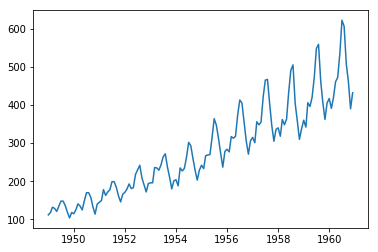

In [6]:
plt.plot(ts)

In [7]:
#p(numero dos termos), q, d(diferenças nao sazonais)
modelo = ARIMA(ts, order=(2, 1, 2))
modelo_treinado = modelo.fit()

/home/filipanselmo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/filipanselmo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/filipanselmo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [8]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Wed, 24 Jul 2019   AIC                           1344.043
Time:                        17:20:06   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.518      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [9]:
previsoes = modelo_treinado.forecast(steps = 12)[0]

In [10]:
previsoes

array([433.11883417, 450.8881036 , 479.81174177, 511.97282595,
       539.32458496, 555.80780852, 558.75631237, 549.28718889,
       531.66570753, 511.90395705, 496.02935751, 488.50604191])

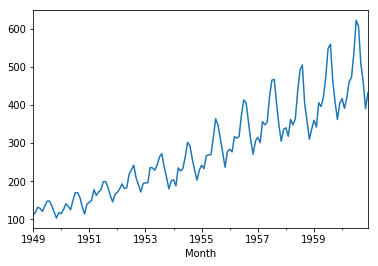

In [11]:
eixo = ts.plot()


/home/filipanselmo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


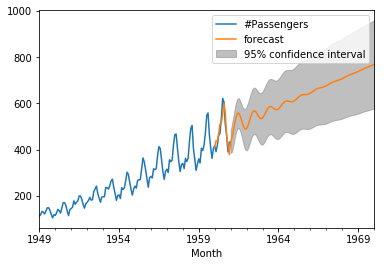

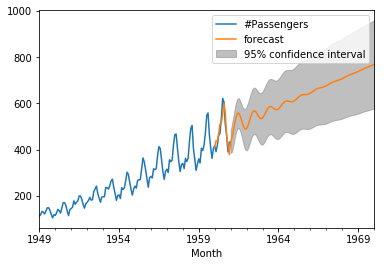

In [12]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1970-01-01',
                            ax = eixo, plot_insample = False)

In [16]:
from pyramid.arima import auto_arima

ModuleNotFoundError: No module named 'pyramid.arima'

In [14]:
modelo_auto = auto_arima(ts, m=12, seasonal=True, trace=True)

NameError: name 'auto_arima' is not defined

In [17]:
modelo_auto.summary()

NameError: name 'modelo_auto' is not defined

In [18]:
proximos_12 = modelo_auto.predict(n_periods=12)

NameError: name 'modelo_auto' is not defined